<a href="https://colab.research.google.com/github/opinner/Articles/blob/main/Articles/IBSCO_data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio
!pip install netCDF4
!pip install cmocean

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmocean as cm

# GeoTIFF

In [3]:
import rasterio
import rasterio.plot

In [4]:
data_name = "https://download.pangaea.de/dataset/937574/files/IBCSO_v2_ice-surface_WGS84.tif"
ice_surface = rasterio.open(data_name)

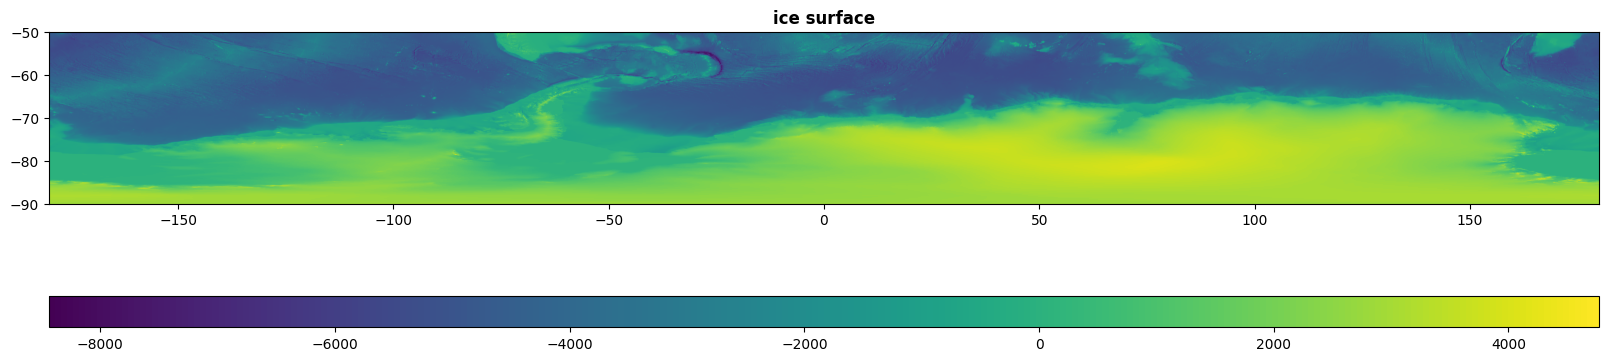

In [5]:
fig, ax = plt.subplots(1, figsize = (20,8))
retted = rasterio.plot.show(ice_surface, title = "ice surface", ax = ax) #uses plt.imshow internally
im = retted.get_images()[0] # access the AxesImage returned by plt.imshow
fig.colorbar(im, ax = ax, orientation = "horizontal", aspect = 50)

In [6]:
data_name = "https://download.pangaea.de/dataset/937574/files/IBCSO_v2_bed_WGS84.tif"
sea_bed = rasterio.open(data_name)

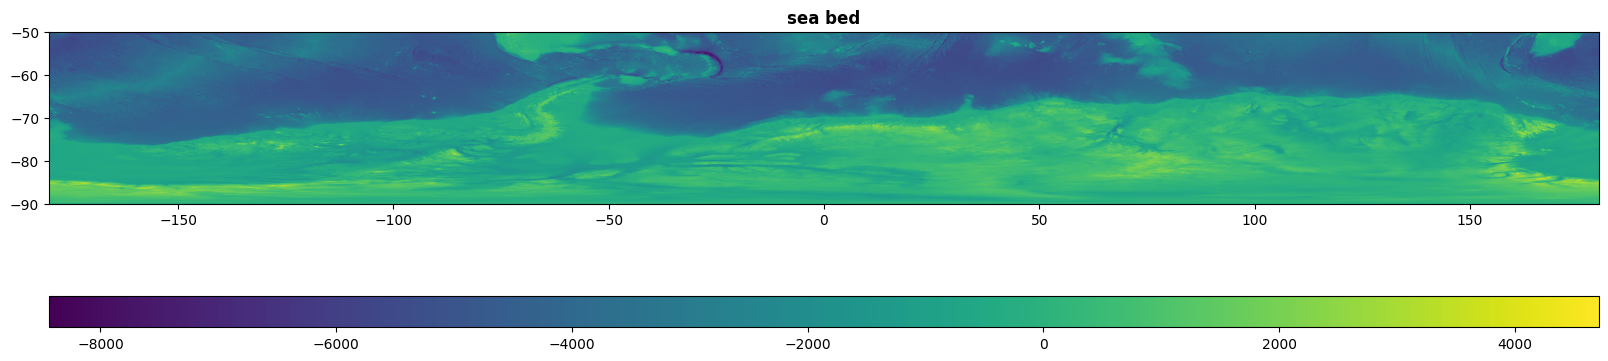

In [7]:
fig, ax = plt.subplots(1, figsize = (20,8))
retted = rasterio.plot.show(sea_bed, title = "sea bed", ax = ax) #uses plt.imshow internally
im = retted.get_images()[0] # access the AxesImage returned by plt.imshow
fig.colorbar(im, ax = ax, orientation = "horizontal", aspect = 50)

## Asthetics

In [8]:
# make a colormap that has ice and ocean clearly delineated and of the
# same length (256 + 256)
colors_undersea = cm.cm.ice(np.linspace(0, 0.8, 2*256))
colors_ice = cm.cm.gray(np.linspace(0.8, 1, 2*256))
all_colors = np.vstack((colors_undersea, colors_ice))
terrain_map = mcolors.LinearSegmentedColormap.from_list(
    'terrain_map', all_colors)

# make the norm with an offset center, to have different dynamic range:
divnorm = mcolors.TwoSlopeNorm(vmin=-6000., vcenter=0, vmax=2000)

# ls = mcolors.LightSource(azdeg=315, altdeg=45)
# # Replace every value lower than 0 with np.nan
# shading = np.where(ice_surface < 0, np.nan, ice_surface)
# rgb = ls.shade(shading, cmap=terrain_map, blend_mode= "soft", vert_exag= 0.1)
# ax.imshow(rgb)

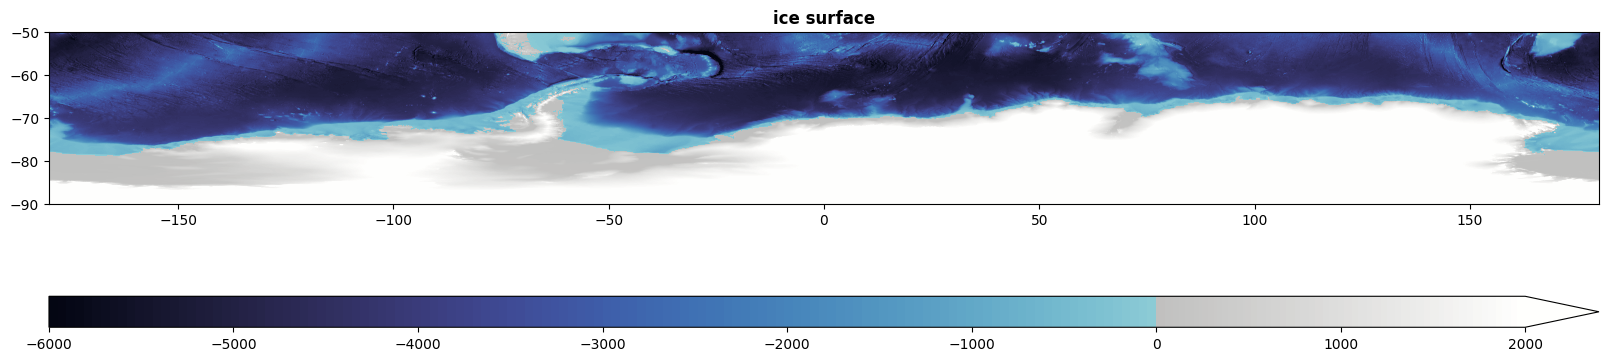

In [9]:
fig, ax = plt.subplots(1, figsize = (20,8))
retted = rasterio.plot.show(ice_surface, title = "ice surface", ax = ax, cmap = terrain_map, norm = divnorm)
im = retted.get_images()[0]
cbar = fig.colorbar(im, ax = ax, orientation = "horizontal", aspect = 50, extend='max')
cbar.ax.set_xscale('linear')

# Netcdf

In [10]:
import netCDF4 as nc

In [11]:
!wget https://download.pangaea.de/dataset/937574/files/IBCSO_v2_ice-surface.nc

--2024-06-25 17:57:04--  https://download.pangaea.de/dataset/937574/files/IBCSO_v2_ice-surface.nc
Resolving download.pangaea.de (download.pangaea.de)... 134.1.2.172
Connecting to download.pangaea.de (download.pangaea.de)|134.1.2.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 737589928 (703M) [application/octet-stream]
Saving to: ‘IBCSO_v2_ice-surface.nc.1’

IBCSO_v2_ice-surfac 100%[===================>] 703.42M  23.0MB/s    in 33s     

2024-06-25 17:57:38 (21.5 MB/s) - ‘IBCSO_v2_ice-surface.nc.1’ saved [737589928/737589928]



In [12]:
path = "./IBCSO_v2_ice-surface.nc"
ds = nc.Dataset(path)

In [13]:
for var in ds.variables.values():
    print(var,'\n')

<class 'netCDF4._netCDF4.Variable'>
|S1 polar_stereographic()
    grid_mapping_name: polar_stereographic
    straight_vertical_longitude_from_pole: 0.0
    false_easting: 0.0
    false_northing: 0.0
    latitude_of_projection_origin: -90.0
    standard_parallel: -65.0
    long_name: CRS definition
    longitude_of_prime_meridian: 0.0
    semi_major_axis: 6378137.0
    inverse_flattening: 298.257223563
    spatial_ref: PROJCS["WGS 84 / IBCSO Polar Stereographic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-65],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",NORTH],AXIS["Northing",NORTH],AUTHORITY["EPSG","9354"]]
    

In [14]:
lon = ds.variables['x'][:]
lat = ds.variables['y'][:]
ice_surface = ds.variables['z'][:]

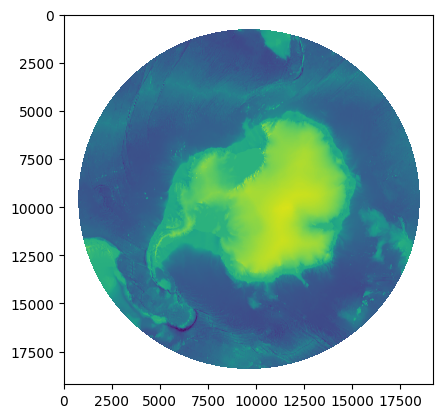

In [15]:
fig, ax = plt.subplots(1)
ax.imshow(ice_surface) # pcolormesh uses much more ram

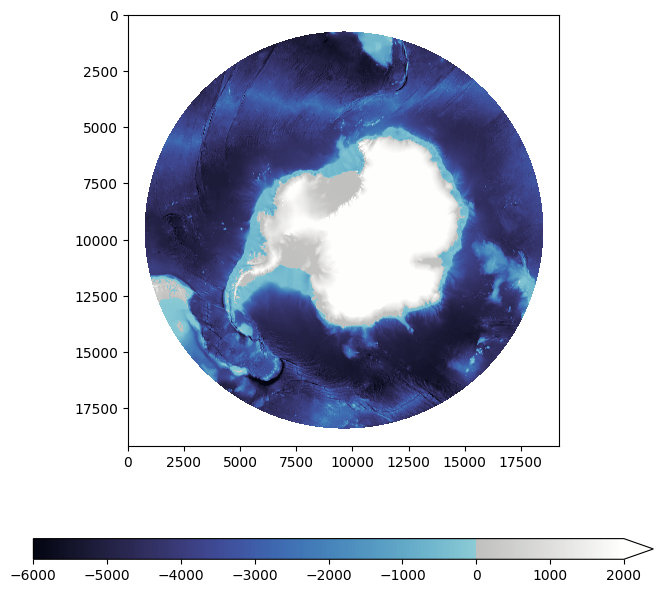

In [16]:
fig, ax = plt.subplots(1, figsize = (8,8))
im = ax.imshow(ice_surface, cmap = terrain_map, norm = divnorm) # pcolormesh uses much more ram
cbar = fig.colorbar(im, ax = ax, orientation = "horizontal", aspect = 30, extend='max')
cbar.ax.set_xscale('linear')